In [ ]:
#Importing necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

#print PyTorch version
print("Version: ", torch.__version__)
# Check if GPU is available
print("GPU is", "available" if torch.cuda.is_available() else "NOT AVAILABLE")

Version:  2.4.0+cu121
GPU is available


**Step 2. In a new .ipynb notebook, reproduce the results utilizing the "QMNIST" dataset**



In [ ]:
#Load the QMNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

train_dataset = datasets.QMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.QMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9704059/9704059 [00:00<00:00, 108101046.12it/s]

Extracting ./data/QMNIST/raw/qmnist-train-images-idx3-ubyte.gz to ./data/QMNIST/raw


100%|██████████| 463024/463024 [00:00<00:00, 11346943.47it/s]

Extracting ./data/QMNIST/raw/qmnist-train-labels-idx2-int.gz to ./data/QMNIST/raw


100%|██████████| 9742279/9742279 [00:00<00:00, 131454840.13it/s]

Extracting ./data/QMNIST/raw/qmnist-test-images-idx3-ubyte.gz to ./data/QMNIST/raw


100%|██████████| 526800/526800 [00:00<00:00, 18445273.79it/s]

Extracting ./data/QMNIST/raw/qmnist-test-labels-idx2-int.gz to ./data/QMNIST/raw


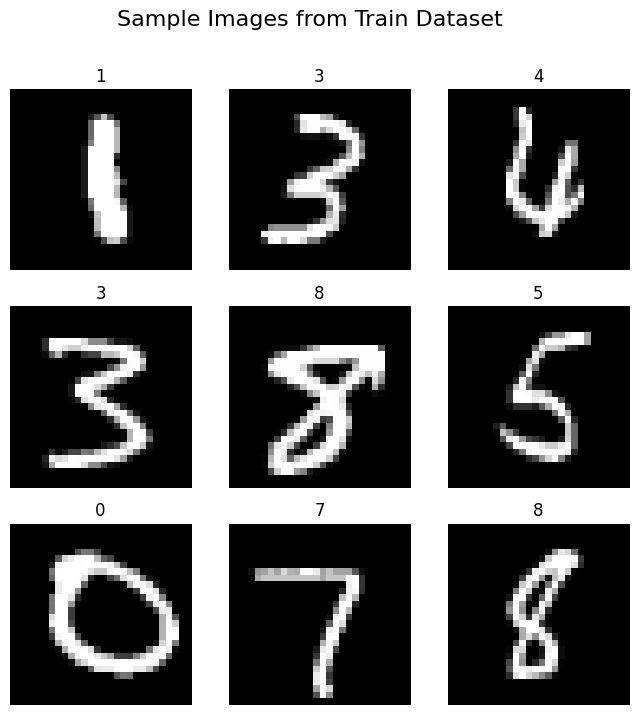

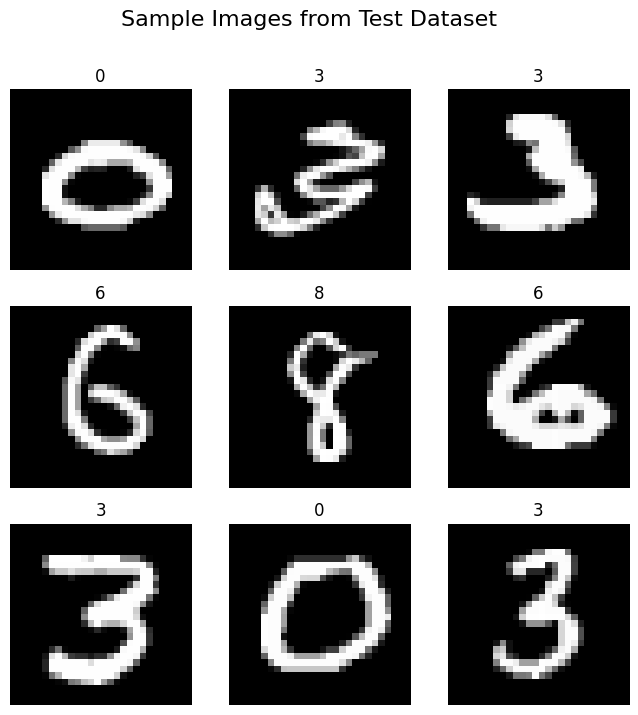

In [ ]:
import matplotlib.pyplot as plt
import torch

# Function to plot images from the chosen dataset (train or test)
def plot_images_from_dataset(dataset, labels_map, cols=3, rows=3, title='Dataset'):
    figure = plt.figure(figsize=(8, 8))
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(dataset), size=(1,)).item()
        img, label = dataset[sample_idx]
        figure.add_subplot(rows, cols, i)
        plt.title(labels_map[label])
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")

    plt.suptitle(f"Sample Images from {title}", fontsize=16)
    plt.show()

# Labels map for digit recognition (assuming QMNIST or MNIST-like dataset)
labels_map = {0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9"}

# Example usage with train_dataset and test_dataset (replace them with your actual datasets)
# Plotting from train dataset
plot_images_from_dataset(train_dataset, labels_map, title='Train Dataset')

# Plotting from test dataset
plot_images_from_dataset(test_dataset, labels_map, title='Test Dataset')


In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)


    def forward(self,x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()


In [ ]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the Neural Network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate running accuracy
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        # Print loss and accuracy every 100 mini-batches
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}, Accuracy: {100 * correct_train / total_train:.2f}%')
            running_loss = 0.0


print("Finished Training")


Epoch 1, Batch 100, Loss: 0.7913231222331524, Accuracy: 75.91%
Epoch 1, Batch 200, Loss: 0.34820043489336966, Accuracy: 82.88%
Epoch 1, Batch 300, Loss: 0.27121053464710715, Accuracy: 85.83%
Epoch 1, Batch 400, Loss: 0.2529939453303814, Accuracy: 87.49%
Epoch 1, Batch 500, Loss: 0.22134227957576513, Accuracy: 88.67%
Epoch 1, Batch 600, Loss: 0.18599049028009176, Accuracy: 89.64%
Epoch 1, Batch 700, Loss: 0.18812430558726193, Accuracy: 90.29%
Epoch 1, Batch 800, Loss: 0.17119657538831234, Accuracy: 90.84%
Epoch 1, Batch 900, Loss: 0.1446566774137318, Accuracy: 91.37%
Epoch 2, Batch 100, Loss: 0.12032355934381485, Accuracy: 96.52%
Epoch 2, Batch 200, Loss: 0.1271681021526456, Accuracy: 96.34%
Epoch 2, Batch 300, Loss: 0.12035515075549483, Accuracy: 96.33%
Epoch 2, Batch 400, Loss: 0.11938812414184213, Accuracy: 96.31%
Epoch 2, Batch 500, Loss: 0.11592827936634421, Accuracy: 96.34%
Epoch 2, Batch 600, Loss: 0.10800148927606643, Accuracy: 96.45%
Epoch 2, Batch 700, Loss: 0.0999930486083030

**Step 3. Report on the results in terms of prediction accuracy on the train and test datasets**

### Train set accuracy

In [ ]:
# Print final training accuracy after all epochs
model.eval()
correct_final_train = 0
total_final_train = 0
with torch.no_grad():
    for inputs, labels in train_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_final_train += labels.size(0)
        correct_final_train += (predicted == labels).sum().item()

print(f'Final Training Accuracy: {100 * correct_final_train / total_final_train:.2f}%')

Final Training Accuracy: 98.61%


### Test set Accuracy

In [ ]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        hb, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuarcy on test set : { correct * 100 / total}%')

Accuarcy on test set : 97.16%


After training the initial model with two hidden layers of 128 and 64 nodes, The model achieved an accuracy of 98.61% on the training dataset after 5 epochs. The loss decreased steadily over the course of training, indicating that the model was learning effectively. On the test dataset, the model reached an accuracy of 97.16%.

**Predicted vs Actual: Model's Prediction on Test Image**

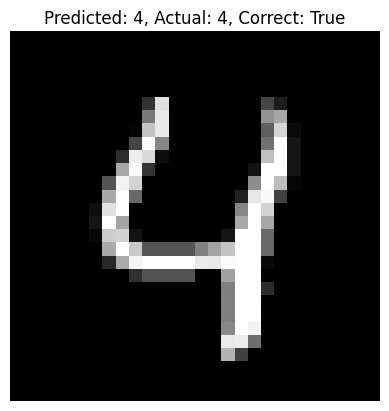

In [ ]:
# Set the model to evaluation mode
model.eval()

# Check if a GPU is available and move the model and data to GPU if so
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Get a batch of test images and labels
images, labels = next(iter(test_loader))

# Select a specific image and label (e.g., 4th image)
image, true_label = images[4].to(device), labels[4].to(device)

# Predict label for the selected image
with torch.no_grad():
    # Ensure the image has a batch dimension by adding an extra dimension
    image = image.unsqueeze(0)

    # Pass the image through the model
    output = model(image)

    # Get the index of the predicted label (the class with the highest output)
    _, predicted_label = torch.max(output, 1)

# Check if the prediction is correct
is_correct = predicted_label.item() == true_label.item()

# Move the image back to CPU for visualization (if running on GPU)
image = image.cpu()

# Visualize the image and display the prediction result
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f'Predicted: {predicted_label.item()}, Actual: {true_label.item()}, Correct: {is_correct}')
plt.axis('off')
plt.show()


Analysis of Results: The model’s performance is consistent with expectations for a basic MLP architecture on the QMNIST dataset. Given the moderate complexity of the network, the model performs reasonably well on handwritten digit recognition, but there's room for improvement by either increasing the model complexity or tuning hyperparameters further.

**Step 4. Choose one of the proposed modifications below:**

1. Add another Dense layer of 128 nodes
2. Increase the current number of nodes in the layer to 256

Choosing to increasing the current number of nodes in the first layer to 256:

**Hypothesis:**
Increasing the number of nodes in the first dense layer from 128 to 256 will increase the model's capacity. It may improve performance slightly by allowing the model to learn more detailed patterns, but the difference in performance may not be as significant as adding another layer, as the model still has a shallow architecture

**Step 5. Modify the model based on the chosen method and train**

In [ ]:
class ModifiedQMNISTModel(nn.Module):
    def __init__(self):
        super(ModifiedQMNISTModel, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)


    def forward(self,x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [ ]:
# Initialize the modified model, loss function, and optimizer
model = ModifiedQMNISTModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Train the Neural Network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate running accuracy
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        # Print loss and accuracy every 100 mini-batches
        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}, Accuracy: {100 * correct_train / total_train:.2f}%')
            running_loss = 0.0


print("Finished Training")

Epoch 1, Batch 100, Loss: 0.6750751928985119, Accuracy: 79.23%
Epoch 1, Batch 200, Loss: 0.306967114508152, Accuracy: 84.93%
Epoch 1, Batch 300, Loss: 0.24784189268946646, Accuracy: 87.57%
Epoch 1, Batch 400, Loss: 0.18963205087929963, Accuracy: 89.28%
Epoch 1, Batch 500, Loss: 0.18429021507501603, Accuracy: 90.27%
Epoch 1, Batch 600, Loss: 0.15792476400732994, Accuracy: 91.09%
Epoch 1, Batch 700, Loss: 0.14428038431331516, Accuracy: 91.75%
Epoch 1, Batch 800, Loss: 0.14302774719893932, Accuracy: 92.22%
Epoch 1, Batch 900, Loss: 0.13528676008805632, Accuracy: 92.61%
Epoch 2, Batch 100, Loss: 0.10602850222028792, Accuracy: 96.78%
Epoch 2, Batch 200, Loss: 0.10448517012409866, Accuracy: 96.77%
Epoch 2, Batch 300, Loss: 0.09314200314693152, Accuracy: 96.93%
Epoch 2, Batch 400, Loss: 0.09490414353087545, Accuracy: 96.95%
Epoch 2, Batch 500, Loss: 0.09138503494672477, Accuracy: 96.97%
Epoch 2, Batch 600, Loss: 0.08805160354822875, Accuracy: 96.98%
Epoch 2, Batch 700, Loss: 0.092340981131419

**Step 6. Report on the results of the modified model and if it matches your hypothesis**

### Train set accuracy

In [ ]:
# Print final training accuracy after all epochs
model.eval()
correct_final_train = 0
total_final_train = 0
with torch.no_grad():
    for inputs, labels in train_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_final_train += labels.size(0)
        correct_final_train += (predicted == labels).sum().item()

print(f'Final Training Accuracy: {100 * correct_final_train / total_final_train:.2f}%')

Final Training Accuracy: 98.87%


### Test set accuracy

In [ ]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        hb, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuarcy on test set : { correct * 100 / total}%')

Accuarcy on test set : 97.23833333333333%


**Predicted vs Actual: Model's Prediction on Test Image**

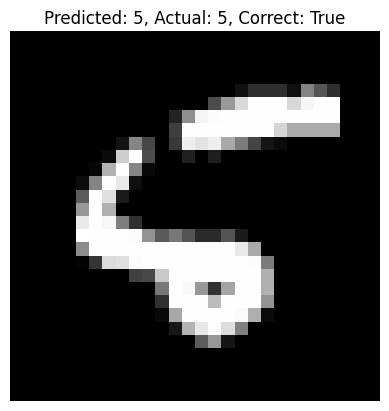

In [ ]:
# Set the model to evaluation mode
model.eval()

# Check if a GPU is available and move the model and data to GPU if so
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Get a batch of test images and labels
images, labels = next(iter(test_loader))

# Select a specific image and label (e.g., 4th image)
image, true_label = images[8].to(device), labels[8].to(device)

# Predict label for the selected image
with torch.no_grad():
    # Ensure the image has a batch dimension by adding an extra dimension
    image = image.unsqueeze(0)

    # Pass the image through the model
    output = model(image)

    # Get the index of the predicted label (the class with the highest output)
    _, predicted_label = torch.max(output, 1)

# Check if the prediction is correct
is_correct = predicted_label.item() == true_label.item()

# Move the image back to CPU for visualization (if running on GPU)
image = image.cpu()

# Visualize the image and display the prediction result
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f'Predicted: {predicted_label.item()}, Actual: {true_label.item()}, Correct: {is_correct}')
plt.axis('off')
plt.show()


**Step 6. Report on the results of the modified model and if it matches your hypothesis**

Increasing the number of nodes in the first layer from 128 to 256 led to minor improvements in both training and test accuracy,

The training accuracy increased from 98.61% to 98.87%.

The test accuracy increased slightly from 97.16% to 97.23%.

showing that the model was able to better learn the training data and generalize slightly better to the test data.

The performance improvement is small because the model architecture is still relatively shallow, and simply increasing the number of nodes in the first layer does not significantly change the model's overall complexity.

Thus, confirming that this change increased the model's capacity to learn.

**Step 7. Experiment with different optimizers, loss functions, dropout, and activation functions, and observe the change in performance as you tune these hyperparameters.**



### Experiment 1: Changing Optimizer to SGD

In [ ]:
class ModifiedQMNISTModel(nn.Module):
    def __init__(self):
        super(ModifiedQMNISTModel, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)


    def forward(self,x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Change optimizer to SGD
model = ModifiedQMNISTModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Train the Neural Network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate running accuracy
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        # Print loss and accuracy every 100 mini-batches
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}, Accuracy: {100 * correct_train / total_train:.2f}%')
            running_loss = 0.0


print("Finished Training")

Epoch 1, Batch 100, Loss: 1.1088613364100457, Accuracy: 67.94%
Epoch 1, Batch 200, Loss: 0.35574066326022147, Accuracy: 78.54%
Epoch 1, Batch 300, Loss: 0.28122647881507873, Accuracy: 82.85%
Epoch 1, Batch 400, Loss: 0.23565272353589534, Accuracy: 85.29%
Epoch 1, Batch 500, Loss: 0.22765577882528304, Accuracy: 86.90%
Epoch 1, Batch 600, Loss: 0.19449205867946148, Accuracy: 88.13%
Epoch 1, Batch 700, Loss: 0.16211897844448686, Accuracy: 89.16%
Epoch 1, Batch 800, Loss: 0.16687297146767377, Accuracy: 89.89%
Epoch 1, Batch 900, Loss: 0.1644595964625478, Accuracy: 90.47%
Epoch 2, Batch 100, Loss: 0.11552127216011286, Accuracy: 96.56%
Epoch 2, Batch 200, Loss: 0.11247400963678957, Accuracy: 96.65%
Epoch 2, Batch 300, Loss: 0.11087341567501426, Accuracy: 96.68%
Epoch 2, Batch 400, Loss: 0.10607023010961711, Accuracy: 96.71%
Epoch 2, Batch 500, Loss: 0.09725784693844616, Accuracy: 96.75%
Epoch 2, Batch 600, Loss: 0.11005633452907204, Accuracy: 96.77%
Epoch 2, Batch 700, Loss: 0.10539760000072

### Train set accuracy

In [ ]:
# Print final training accuracy after all epochs
model.eval()
correct_final_train = 0
total_final_train = 0
with torch.no_grad():
    for inputs, labels in train_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_final_train += labels.size(0)
        correct_final_train += (predicted == labels).sum().item()

print(f'Final Training Accuracy: {100 * correct_final_train / total_final_train:.2f}%')

Final Training Accuracy: 99.03%


#### Test set accuracy

In [ ]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        hb, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuarcy on test set : { correct * 100 / total}%')

Accuarcy on test set : 97.345%


After changing optimizer to SDG. Training accuracy increased from 98.87% to 99.03%. Test accuracy increased from 97.24% to 97.345%. The loss with Adam was lower throughout the training process, especially in the early epochs. SGD had higher initial losses but gradually reduced them over time. Adam's loss at Batch 100 of Epoch 1 was 0.675 while SGD's loss at the same point was 1.063. This indicates that Adam was more efficient in minimizing loss in the early stages of training.

### Experiment 2: Changing Loss function to Mean Square Error

In [ ]:
class MLPMSE(nn.Module):
    def __init__(self):
        super(MLPMSE, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)


    def forward(self,x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = MLPMSE()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the Neural Network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)

        # MSE expects the labels to be one-hot encoded, so we will convert them
        labels_one_hot = nn.functional.one_hot(labels, num_classes=10).float()
        loss = criterion(outputs, labels_one_hot)

        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate running accuracy
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}, Accuracy: {100 * correct_train / total_train:.2f}%')
            running_loss = 0.0

print("Finished Training with MSE Loss")

Epoch 1, Batch 100, Loss: 0.10810515439137816, Accuracy: 63.64%
Epoch 1, Batch 200, Loss: 0.026313371919095517, Accuracy: 75.71%
Epoch 1, Batch 300, Loss: 0.021425461107864977, Accuracy: 80.44%
Epoch 1, Batch 400, Loss: 0.018884534202516078, Accuracy: 82.94%
Epoch 1, Batch 500, Loss: 0.0180106651969254, Accuracy: 84.58%
Epoch 1, Batch 600, Loss: 0.017988986745476724, Accuracy: 85.65%
Epoch 1, Batch 700, Loss: 0.017672817818820477, Accuracy: 86.44%
Epoch 1, Batch 800, Loss: 0.016983428988605737, Accuracy: 87.07%
Epoch 1, Batch 900, Loss: 0.017436049887910487, Accuracy: 87.51%
Epoch 2, Batch 100, Loss: 0.015699657439254226, Accuracy: 92.00%
Epoch 2, Batch 200, Loss: 0.01607332896441221, Accuracy: 91.79%
Epoch 2, Batch 300, Loss: 0.015664311619475485, Accuracy: 91.64%
Epoch 2, Batch 400, Loss: 0.014863017797470093, Accuracy: 91.88%
Epoch 2, Batch 500, Loss: 0.01509871550835669, Accuracy: 92.00%
Epoch 2, Batch 600, Loss: 0.015813347510993482, Accuracy: 92.02%
Epoch 2, Batch 700, Loss: 0.01

### Train set accuracy

In [ ]:
# Print final training accuracy after all epochs
model.eval()
correct_final_train = 0
total_final_train = 0
with torch.no_grad():
    for inputs, labels in train_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_final_train += labels.size(0)
        correct_final_train += (predicted == labels).sum().item()

print(f'Final Training Accuracy: {100 * correct_final_train / total_final_train:.2f}%')

Final Training Accuracy: 92.33%


### Test set accuracy

In [ ]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        hb, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuarcy on test set : { correct * 100 / total}%')

Accuarcy on test set : 91.27833333333334%


After changing to MSELoss function observed the following changes.

MSELoss results in a much slower learning process compared to CrossEntropyLoss. It treats class labels as continuous values, which is not ideal for classification tasks where each output should correspond to a discrete class.

The final training accuracy with MSELoss is 92.33%, while the final test accuracy is 91.27%, both of which are lower than what was achieved using CrossEntropyLoss (98.87% and 97.24%, respectively).

The loss values with MSELoss tend to decrease more slowly, and the model struggles to reach the same level of accuracy as it does with CrossEntropyLoss.

After switching to MSELoss, the model's performance decreased in terms of both training and test accuracy, confirming that CrossEntropyLoss is a much better fit for this type of problem.

### Experiment 3 Adding dropout layers with 0.5 dropout probability

In [ ]:
# Define a modified MLP model with Dropout layers
class MLPDropout(nn.Module):
    def __init__(self):
        super(MLPDropout, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x


model = MLPDropout()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the Neural Network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)

        # MSE expects the labels to be one-hot encoded, so we will convert them
        labels_one_hot = nn.functional.one_hot(labels, num_classes=10).float()
        loss = criterion(outputs, labels_one_hot)

        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate running accuracy
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}, Accuracy: {100 * correct_train / total_train:.2f}%')
            running_loss = 0.0

print("Finished Training")


Epoch 1, Batch 100, Loss: 1.2100533795356752, Accuracy: 60.38%
Epoch 1, Batch 200, Loss: 0.5966646289825439, Accuracy: 70.78%
Epoch 1, Batch 300, Loss: 0.4884365272521973, Accuracy: 75.59%
Epoch 1, Batch 400, Loss: 0.4459066727757454, Accuracy: 78.42%
Epoch 1, Batch 500, Loss: 0.4058012627065182, Accuracy: 80.29%
Epoch 1, Batch 600, Loss: 0.38752472698688506, Accuracy: 81.67%
Epoch 1, Batch 700, Loss: 0.3652061070501804, Accuracy: 82.80%
Epoch 1, Batch 800, Loss: 0.3530286122858524, Accuracy: 83.68%
Epoch 1, Batch 900, Loss: 0.33514623463153836, Accuracy: 84.36%
Epoch 2, Batch 100, Loss: 0.307553373426199, Accuracy: 91.05%
Epoch 2, Batch 200, Loss: 0.3100362830609083, Accuracy: 91.00%
Epoch 2, Batch 300, Loss: 0.2774612945318222, Accuracy: 91.26%
Epoch 2, Batch 400, Loss: 0.2932775680720806, Accuracy: 91.35%
Epoch 2, Batch 500, Loss: 0.30113917618989944, Accuracy: 91.34%
Epoch 2, Batch 600, Loss: 0.29923836812376975, Accuracy: 91.40%
Epoch 2, Batch 700, Loss: 0.3009331047534943, Accura

### Train set accuracy

In [ ]:
# Print final training accuracy after all epochs
model.eval()
correct_final_train = 0
total_final_train = 0
with torch.no_grad():
    for inputs, labels in train_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_final_train += labels.size(0)
        correct_final_train += (predicted == labels).sum().item()

print(f'Final Training Accuracy: {100 * correct_final_train / total_final_train:.2f}%')

Final Training Accuracy: 97.19%


### Test set accuracy

In [ ]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        hb, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuarcy on test set : { correct * 100 / total}%')

Accuarcy on test set : 96.37166666666667%


After adding droput layer with 0.5 probability there is is significant increase in the train accuracy from 92.33% to 97.19%. Test accuracy from 91.27% to 96.37%.
The model trained more slowly with dropout set to 0.5, as expected. The initial accuracy at Epoch 1, Batch 100 was 60.38%, which is relatively low compared to lower dropout settings.
The model continued to learn throughout the epochs, achieving 93.75% accuracy at Epoch 5.
Test accuracy ended up at 96.37%, showing that the model generalized relatively well but may have been affected by the higher dropout rate.


### Experiment 4 Adding dropout layer with 0.3 dropout probabitily

In [ ]:
# Define a modified MLP model with Dropout layers
class MLPDropOut(nn.Module):
    def __init__(self):
        super(MLPDropOut, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(p=0.3)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x


model = MLPDropOut()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the Neural Network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)

        # MSE expects the labels to be one-hot encoded, so we will convert them
        labels_one_hot = nn.functional.one_hot(labels, num_classes=10).float()
        loss = criterion(outputs, labels_one_hot)

        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate running accuracy
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}, Accuracy: {100 * correct_train / total_train:.2f}%')
            running_loss = 0.0

print("Finished Training")


Epoch 1, Batch 100, Loss: 0.9655881690979004, Accuracy: 69.14%
Epoch 1, Batch 200, Loss: 0.42830525994300844, Accuracy: 78.24%
Epoch 1, Batch 300, Loss: 0.343898633569479, Accuracy: 82.04%
Epoch 1, Batch 400, Loss: 0.3016362091898918, Accuracy: 84.18%
Epoch 1, Batch 500, Loss: 0.28581529974937436, Accuracy: 85.71%
Epoch 1, Batch 600, Loss: 0.2612799448519945, Accuracy: 86.77%
Epoch 1, Batch 700, Loss: 0.248405991718173, Accuracy: 87.59%
Epoch 1, Batch 800, Loss: 0.23157675076276063, Accuracy: 88.27%
Epoch 1, Batch 900, Loss: 0.2266013779491186, Accuracy: 88.81%
Epoch 2, Batch 100, Loss: 0.2006715799123049, Accuracy: 94.20%
Epoch 2, Batch 200, Loss: 0.19966412987560034, Accuracy: 93.96%
Epoch 2, Batch 300, Loss: 0.18687666047364473, Accuracy: 94.09%
Epoch 2, Batch 400, Loss: 0.19772511184215547, Accuracy: 94.11%
Epoch 2, Batch 500, Loss: 0.1856038311123848, Accuracy: 94.22%
Epoch 2, Batch 600, Loss: 0.19564152926206588, Accuracy: 94.27%
Epoch 2, Batch 700, Loss: 0.16809922818094492, Acc

### Train set accuracy

In [ ]:
# Print final training accuracy after all epochs
model.eval()
correct_final_train = 0
total_final_train = 0
with torch.no_grad():
    for inputs, labels in train_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_final_train += labels.size(0)
        correct_final_train += (predicted == labels).sum().item()

print(f'Final Training Accuracy: {100 * correct_final_train / total_final_train:.2f}%')

Final Training Accuracy: 98.28%


### Test set accuracy

In [ ]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        hb, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuarcy on test set : { correct * 100 / total}%')

Accuarcy on test set : 97.065%


With a smaller dropout rate of 0.3, the model showed faster learning and higher initial accuracy. At Epoch 1, Batch 100, accuracy was already 69.14%, significantly higher than the 60.38% achieved with dropout 0.5.
Throughout training, the accuracy continued to increase steadily, ending at 96.20% at Epoch 5.
The test accuracy reached 97.07%, which is notably higher than the accuracy achieved with dropout 0.5.

### Experiment 5 Changing Activation Function to Sigmoid instead of Relu

In [ ]:
class MLPSigmoid(nn.Module):
    def __init__(self):
        super(MLPSigmoid, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model and optimizer
model = MLPSigmoid()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the Neural Network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)

        # CrossEntropyLoss expects labels as integers, no need for one-hot encoding
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate running accuracy
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}, Accuracy: {100 * correct_train / total_train:.2f}%')
            running_loss = 0.0

print("Finished Training")


Epoch 1, Batch 100, Loss: 1.6692158377170563, Accuracy: 55.72%
Epoch 1, Batch 200, Loss: 0.7082326367497445, Accuracy: 70.58%
Epoch 1, Batch 300, Loss: 0.43954642981290815, Accuracy: 76.88%
Epoch 1, Batch 400, Loss: 0.3437944060564041, Accuracy: 80.37%
Epoch 1, Batch 500, Loss: 0.299319678619504, Accuracy: 82.65%
Epoch 1, Batch 600, Loss: 0.27611223742365837, Accuracy: 84.24%
Epoch 1, Batch 700, Loss: 0.25028661228716376, Accuracy: 85.55%
Epoch 1, Batch 800, Loss: 0.24038545079529286, Accuracy: 86.48%
Epoch 1, Batch 900, Loss: 0.21929240837693215, Accuracy: 87.28%
Epoch 2, Batch 100, Loss: 0.20441444031894207, Accuracy: 94.30%
Epoch 2, Batch 200, Loss: 0.18049352530390025, Accuracy: 94.63%
Epoch 2, Batch 300, Loss: 0.15670171074569225, Accuracy: 94.96%
Epoch 2, Batch 400, Loss: 0.15761175692081453, Accuracy: 95.03%
Epoch 2, Batch 500, Loss: 0.15531903870403765, Accuracy: 95.12%
Epoch 2, Batch 600, Loss: 0.13978490225970744, Accuracy: 95.23%
Epoch 2, Batch 700, Loss: 0.15091561777517198

### Train set accuracy

In [ ]:
# Print final training accuracy after all epochs
model.eval()
correct_final_train = 0
total_final_train = 0
with torch.no_grad():
    for inputs, labels in train_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_final_train += labels.size(0)
        correct_final_train += (predicted == labels).sum().item()

print(f'Final Training Accuracy: {100 * correct_final_train / total_final_train:.2f}%')

Final Training Accuracy: 98.78%


### Test set accuracy

In [ ]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        hb, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuarcy on test set : { correct * 100 / total}%')

Accuarcy on test set : 97.09333333333333%


The model with Sigmoid activation starts with relatively low initial accuracy at 55.72% in Epoch 1, Batch 100, but steadily improves during the first epoch.
Throughout training, the accuracy increases consistently, reaching 98.19% at the end of Epoch 5.
Final test accuracy was 97.09%, which is quite good but slightly lower compared to models with other activation functions such as ReLU.

### Experiment 6 Changing activation function to tanh instead of sigmoid

In [ ]:
class MLPTanh(nn.Module):
    def __init__(self):
        super(MLPTanh, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.tanh(self.fc1(x))  # Tanh activation function
        x = torch.tanh(self.fc2(x))  # Tanh activation function
        x = self.fc3(x)
        return x

# Initialize model and optimizer
model = MLPTanh()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the Neural Network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)

        # CrossEntropyLoss expects labels as integers, no need for one-hot encoding
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate running accuracy
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}, Accuracy: {100 * correct_train / total_train:.2f}%')
            running_loss = 0.0

print("Finished Training")


Epoch 1, Batch 100, Loss: 0.7248548841476441, Accuracy: 80.19%
Epoch 1, Batch 200, Loss: 0.3096750678122044, Accuracy: 85.62%
Epoch 1, Batch 300, Loss: 0.26713980309665203, Accuracy: 87.77%
Epoch 1, Batch 400, Loss: 0.2223185910657048, Accuracy: 89.27%
Epoch 1, Batch 500, Loss: 0.18473042119294406, Accuracy: 90.27%
Epoch 1, Batch 600, Loss: 0.18741492465138435, Accuracy: 90.93%
Epoch 1, Batch 700, Loss: 0.1696724094077945, Accuracy: 91.48%
Epoch 1, Batch 800, Loss: 0.16038212038576602, Accuracy: 91.99%
Epoch 1, Batch 900, Loss: 0.13943557580932975, Accuracy: 92.41%
Epoch 2, Batch 100, Loss: 0.1127357530966401, Accuracy: 96.75%
Epoch 2, Batch 200, Loss: 0.1207647518068552, Accuracy: 96.60%
Epoch 2, Batch 300, Loss: 0.120557562969625, Accuracy: 96.45%
Epoch 2, Batch 400, Loss: 0.11059408841654658, Accuracy: 96.51%
Epoch 2, Batch 500, Loss: 0.0978222326003015, Accuracy: 96.58%
Epoch 2, Batch 600, Loss: 0.11036528890021145, Accuracy: 96.58%
Epoch 2, Batch 700, Loss: 0.10902069764211773, Ac

### Train set accuracy

In [ ]:
# Print final training accuracy after all epochs
model.eval()
correct_final_train = 0
total_final_train = 0
with torch.no_grad():
    for inputs, labels in train_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_final_train += labels.size(0)
        correct_final_train += (predicted == labels).sum().item()

print(f'Final Training Accuracy: {100 * correct_final_train / total_final_train:.2f}%')

Final Training Accuracy: 98.51%


### Test set accuracy

In [ ]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        hb, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuarcy on test set : { correct * 100 / total}%')

Accuarcy on test set : 96.76666666666667%


The model using Tanh starts with a significantly higher initial accuracy of 80.19% at Epoch 1, Batch 100 compared to Sigmoid's 55.72%.
Throughout the epochs, the accuracy increases consistently but more slowly during later epochs, with the final training accuracy reaching 98.51%.
Final test accuracy was 96.77%, which is slightly lower than the accuracy achieved using Sigmoid activation.